In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [2]:
from data_structures.cfr_trees import CFRTree, CFRJointStrategy
from games.kuhn import build_kuhn_tree
from cfr_code.sample_cfr import SolveWithSampleCFR
from utilities.graphs import graphs_from_cfr_results, epsilon_graph

In [3]:
kuhn_tree = build_kuhn_tree(2, 3)

In [4]:
cfr_tree = CFRTree(kuhn_tree)

In [5]:
%time res = SolveWithSampleCFR(cfr_tree, 100000, checkEveryIteration = 1000, bootstrap_iterations = 1000, \
                               show_perc = True)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
CPU times: user 13.2 s, sys: 20 ms, total: 13.2 s
Wall time: 13.2 s


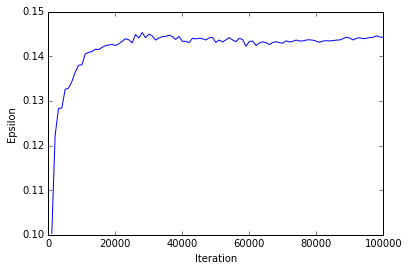

In [6]:
epsilon_graph(res)

In [7]:
kuhn_tree.display()

Player -42 - Infoset -42 - Node 0
Player 0 - Infoset 1 - Node 1 (children of Node0 via Action None)
Player 0 - Infoset 1 - Node 10 (children of Node0 via Action None)
Player 0 - Infoset 9 - Node 19 (children of Node0 via Action None)
Player 0 - Infoset 9 - Node 28 (children of Node0 via Action None)
Player 0 - Infoset 17 - Node 37 (children of Node0 via Action None)
Player 0 - Infoset 17 - Node 46 (children of Node0 via Action None)
Player 1 - Infoset 2 - Node 2 (children of Node1 via Action p0c)
Player 1 - Infoset 4 - Node 7 (children of Node1 via Action p0b)
Leaf3 (children of Node2 via Action 2.0) -  utility is [-1, 1]
Player 0 - Infoset 3 - Node 4 (children of Node2 via Action p1b)
Leaf5 (children of Node4 via Action 3.0) -  utility is [-2, 2]
Leaf6 (children of Node4 via Action 3.1) -  utility is [-1, 1]
Leaf8 (children of Node7 via Action 4.0) -  utility is [-2, 2]
Leaf9 (children of Node7 via Action 4.1) -  utility is [1, -1]
Player 1 - Infoset 6 - Node 11 (children of Node10 vi

In [8]:
res['utility']

[-0.055890000000000016, 0.055890000000000016]

In [9]:
for c in cfr_tree.root.children:
    print(c.information_set.V(res['joint']))

-0.3497366666666667
-0.3497366666666667
0.10925000000000003
0.10925000000000003
0.5055833333333333
0.5055833333333333


In [10]:
cfr_tree.root.children[5].information_set.V(res['joint'])

0.5055833333333333

In [11]:
res['utility']

[-0.055890000000000016, 0.055890000000000016]

In [12]:
self = cfr_tree.root.children[5].information_set
joint = res['joint']

v = [0] * self.action_count

this_player_infosets = self.cfr_tree.infosets_by_player[self.player]

sequence = self.sequence.copy()
modification_sequence = self.sequence.copy()

# Delete from actionPlan all the actions by the current player
for iset in this_player_infosets:
    if(iset.id not in sequence):
        modification_sequence[iset.id] = -1

tot_freq = [0, 0]
        
for a in range(self.action_count):
    sequence[self.id] = a
    modification_sequence[self.id] = a

    children = list(filter(lambda iset: iset.sequence == sequence, this_player_infosets))

    # "Leaves" part of the sum
    # TODO: optimize this loop, it is too much to loop over all plans in the joint
    for actionPlanString in joint.plans:
        actionPlan = CFRJointStrategy.stringToActionPlan(actionPlanString)

        updatedPlan = actionPlan.copy()
        updatedPlan.update(modification_sequence)
        if(not self.cfr_tree.root.isActionPlanLeadingToInfoset(actionPlan, self)):
            continue

        frequency = joint.plans[actionPlanString] / joint.frequencyCount
        tot_freq[a] += frequency
        
        for n in self.nodes:
            u = n.utilityFromModifiedActionPlan(actionPlan, modification_sequence, \
                                                default = [0] * self.cfr_tree.numOfPlayers)

            if(u != None):
                p = self.cfr_tree.root.distribution[self.cfr_tree.root.base_node.getActionLeadingToNode(n.base_node)]
                v[a] += frequency * u[self.player] * p

    # "Recursive" part of the sum
    for child in children:
        v[a] += child.V(joint)
        
print(tot_freq)
v

[0.9999999999999999, 0.9999999999999999]


[0.5055833333333333, 0.3943566666666667]

In [ ]:
cfr_tree.checkEquilibrium(res['joint'])

In [ ]:
print(cfr_tree.root.children[0].information_set.V(res['joint']))
print(cfr_tree.root.children[1].information_set.V(res['joint']))

In [ ]:
cfr_tree.root.children[0].children[0].children[1].information_set.V(res['joint'], True)

In [ ]:
self = cfr_tree.root.children[0].children[0].children[1].information_set
joint = res['joint']

v = [0] * self.action_count

this_player_infosets = self.cfr_tree.infosets_by_player[self.player]

sequence = self.sequence.copy()
modification_sequence = self.sequence.copy()

# Delete from actionPlan all the actions by the current player
for iset in this_player_infosets:
    if(iset.id not in sequence):
        modification_sequence[iset.id] = -1

for a in range(self.action_count):
    sequence[self.id] = a
    modification_sequence[self.id] = a

    children = list(filter(lambda iset: iset.sequence == sequence, this_player_infosets))

    # "Leaves" part of the sum
    # TODO: optimize this loop, it is too much to loop over all plans in the joint
    for actionPlanString in joint.plans:
        actionPlan = CFRJointStrategy.stringToActionPlan(actionPlanString)

        #updatedPlan = actionPlan.copy()
        #updatedPlan.update(modification_sequence)
        if(not self.cfr_tree.root.isActionPlanLeadingToInfoset(actionPlan, self)):
            continue

        frequency = joint.plans[actionPlanString] / joint.frequencyCount

        for n in self.nodes:
            u = n.utilityFromModifiedActionPlan(actionPlan, modification_sequence, \
                                                default = [0] * self.cfr_tree.numOfPlayers)

            if(u != None):
                print("Action plan = " + actionPlanString)
                print("Frequency = " + str(frequency))
                print("U = " + str(u))
                print("v[" + str(a) + "] += " + str(frequency * u[self.player]))
                v[a] += frequency * u[self.player]

    # "Recursive" part of the sum
    for child in children:
        v[a] += child.V(joint)
v

In [ ]:
cfr_tree.root.children[1].information_set.V(res['joint'])

In [ ]:
cfr_tree.getUtility(res['joint'])

In [ ]:
res['joint'].plans

In [ ]:
kuhn_tree.display()

In [ ]:
epsilon_graph(SolveWithSampleCFR(CFRTree(build_kuhn_tree(2,3)), 100000, checkEveryIteration = 1000, \
                               bootstrap_iterations = 1000, show_perc = True))

In [ ]:
epsilon_graph(SolveWithSampleCFR(CFRTree(build_kuhn_tree(2,4)), 100000, checkEveryIteration = 1000, \
                               bootstrap_iterations = 1000, show_perc = True))

In [ ]:
epsilon_graph(SolveWithSampleCFR(CFRTree(build_kuhn_tree(3,3)), 100000, checkEveryIteration = 1000, \
                               bootstrap_iterations = 1000, show_perc = True))

# Kuhn equilibrium plans interpretation

In [ ]:
from data_structures.cfr_trees import CFRJointStrategy

In [ ]:
big_plans = list(map(lambda el: (CFRJointStrategy.stringToActionPlan(el[0]), el[1]), 
                     filter(lambda el: el[1] > 0, res['joint'].plans.items())))
print("There are " + str(len(big_plans)) + " big plans")
print("They cover " + str(sum(map(lambda el: el[1], big_plans)) / res['joint'].frequencyCount * 100) + 
      "% of samples")

In [ ]:
def kuhn_tree_traverse_via_action_plan(node, action_plan):
    if(node.isChance()):
        results = []
        for i in range(len(node.children)):
            r = node.actionNames[i] + " - " + kuhn_tree_traverse_via_action_plan(node.children[i], action_plan)
            results.append(r)
        return results
    
    if(node.isLeaf()):
        return ""
    
    a = action_plan[node.information_set]
    action_name = node.actionNames[a]
    return action_name + " - " + kuhn_tree_traverse_via_action_plan(node.children[a], action_plan)

In [ ]:
plans = {}
total_frequency = res['joint'].frequencyCount
for p in big_plans:
    for s in kuhn_tree_traverse_via_action_plan(kuhn_tree.root, p[0]):
        #print(s + str(p[1]))
        if(s in plans):
            plans[s] += p[1] / total_frequency
        else:
            plans[s] = p[1] / total_frequency

In [ ]:
to_del = []
for (p, f) in plans.items():
    if(f < 0.01):
        to_del.append(p)
for p in to_del:
    del plans[p]
plans